<a href="https://colab.research.google.com/github/ii200400/Tensorflow_Tutorial/blob/master/06%20-%20MNIST/02_Dropout(2_1ver).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 개요

과적합 방지 기법을 알아보자.

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

TensorFlow 2.x selected.


## 데이터 정의

In [ ]:
# MNIST 데이터셋을 케라스 함수로 받아온다.
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# flattening하고 샘플 값을 정수에서 부동소수로 바꾼다.
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

# 레이블 데이터에 one-hot encoding을 적용한다.
y_train, y_test = tf.one_hot(y_train, depth=10).numpy(), tf.one_hot(y_test, depth=10).numpy()

11493376/11490434 [==============================] - 0s 0us/step


### 모델 구성

### 신경망 정의

In [ ]:
def make_model():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation=tf.nn.relu, use_bias=False, input_shape=(784,)),
    # 사용자가 넣은 확률만큼 랜덤으로 신경망에 적용시키지 않을 뉴런을 결정한다.
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation=tf.nn.relu, use_bias=False),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax, use_bias=False)
  ])

  return model

model = make_model()

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200704    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65536     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2560      
Total params: 268,800
Trainable params: 268,800
Non-trainable params: 0
_________________________________________________________________


### 최적화 / 손실 클래스 선택

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### 모델 훈련

In [ ]:
batch_size = 100
epoch = 30

model.fit(x=x_train, 
          y=y_train,
          batch_size=batch_size,
          epochs=epoch)

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2733 - accuracy: 0.9196
Epoch 2/30
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1140 - accuracy: 0.9652
Epoch 3/30
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0826 - accuracy: 0.9740
Epoch 4/30
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0663 - accuracy: 0.9791
Epoch 5/30
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0546 - accuracy: 0.9821
Epoch 6/30
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0474 - accuracy: 0.9844
Epoch 7/30
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0410 - accuracy: 0.9863
Epoch 8/30
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0343 - accuracy: 0.9885
Epoch 9/30
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0345 - accuracy: 0.9883
Epoch 10/30
60

### 모델 테스트

In [ ]:
model.evaluate(x=x_test,
               y=y_test,
               batch_size=batch_size)

10000/10000 [==============================] - 0s 35us/sample - loss: 0.0863 - accuracy: 0.9830


[0.08634935715298099, 0.983]

## 추가 사항

### 1. matplot 모델 테스트

matplot의 사용방법은 따로 배워야 한다.\
간단하게 주석으로 설명을 남기겠다.

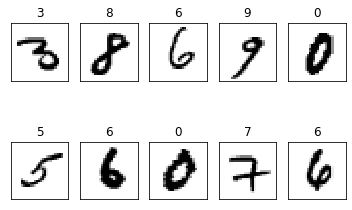

In [ ]:
import matplotlib.pyplot as plt

# 직접 이미지를 10개씩만 골라서 예측을 어떻게 할 것인지 보겠다.
# 만약 다른 이미지를 예측하는 것을 보고 싶다면 간단하게 num의 숫자만 바꾸면 된다.
num = 3
images = x_train[10*num:10*(num+1)]
predicts = tf.argmax(model(images), 1)

# 이미지 윈도우를 만들고 그것을 편집할 수 있게 만들어주는 함수
fig = plt.figure()
for i in range(10):
  # [2,5]로 구획을 나누고 그중 i+1번째의 위치에 작은 창을 만든다.
  subplot = fig.add_subplot(2, 5, i + 1)
  # 해당 창의 가로 세로 눈금을 지정하는데 여기서는 지정해주지 않았다.
  subplot.set_xticks([])
  subplot.set_yticks([])
  # 모델이 예측한 숫자를 보여준다.
  subplot.set_title('%d' % predicts[i])
  # 예측할 때 사용한 이미지를 흑백으로 보여준다.
  subplot.imshow(images[i].reshape((28, 28)),
                  cmap=plt.cm.gray_r)

### 3. 모델 저장 및 불러오기 + 비용 그래프 그리기

모델을 저장하는 방법은 크게 3가지가 있는 것 같다.

1. tf.keras.callbacks.ModelCheckpoint()\
훈련 중간과 훈련 마지막에 체크포인트(checkpoint)를 자동으로 저장하도록 하는 방법이다.\
model.fit의 매개변수로 넣어주면 알아서 채크포인트를 만든다.
2. model.save()\
모델의 그래프와 가중치, 기타 옵션(최적화 함수 등)을 모두 저장하는 방식
3. model.save_weight()\
모델의 가중치만 저장하는 방식, 당연히 파일이 더 가볍다.\
대신 load 후 다시 model.compile()을 해야한다.

#### 3-1. tf.keras.callbacks.ModelCheckpoint

In [ ]:
checkpoint_path = 'drive/My Drive/Colab Notebooks/3분 딥러닝 텐서플로맛/06 - MNIST/saved checkpoint'
checkpoint_name = checkpoint_path + '/cp-{epoch:04d}.ckpt'

# 새로운 모델을 만들고 
new_model = make_model()
new_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# callback함수도 정의한 후에
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_name, verbose=1, save_weights_only=True,
    # 다섯 번째 에포크마다 가중치를 저장한다!
    period=5)

# callback함수를 활용하여 checkpoint 자동생성을 시켜본다.
batch_size = 100
epoch = 30

new_model.fit(x=x_train, 
              y=y_train,
              batch_size=batch_size,
              epochs=epoch,
              callbacks=[cp_callback])

loss, acc = new_model.evaluate(x_test,  y_test, verbose=2)
print("저장된 모델의 정확도: {:5.2f}%".format(100*acc))

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2744 - accuracy: 0.9193
Epoch 2/30
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1134 - accuracy: 0.9653
Epoch 3/30
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0826 - accuracy: 0.9738
Epoch 4/30
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0643 - accuracy: 0.9787
Epoch 5/30
59500/60000 [============================>.] - ETA: 0s - loss: 0.0540 - accuracy: 0.9827
Epoch 00005: saving model to drive/My Drive/Colab Notebooks/3분 딥러닝 텐서플로맛/06 - MNIST/saved checkpoint/cp-0005.ckpt
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0540 - accuracy: 0.9827
Epoch 6/30
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0462 - accuracy: 0.9854
Epoch 7/30
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0396 - accuracy: 0.9868
Epoch 8/30
60000/60000 [=

In [ ]:
# 가장 최근의 채크포인트 파일을 주어진 경로에서 가져온다.
latest = tf.train.latest_checkpoint(checkpoint_path)

# 저장이 잘 되어있는지 확인할 테스트 모델을 만들고 
test_model = make_model()
test_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), 
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# 채크포인트에 저장된 정보를 적용시킨다.
test_model.load_weights(latest)
loss, acc = test_model.evaluate(x_test,  y_test, verbose=2)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

10000/10000 - 1s - loss: 0.0981 - accuracy: 0.9801
복원된 모델의 정확도: 98.01%


#### 3-2. model.save

In [ ]:
savefile_path = 'drive/My Drive/Colab Notebooks/3분 딥러닝 텐서플로맛/06 - MNIST/saved model'

# 학습시킨 모델을 저장한다.
model.save(savefile_path + '/my_model.h5', save_format='h5')

# 새로운 모델을 만들어 위에서 저장한 파일을 불러온다.
new_model = make_model()
new_model = tf.keras.models.load_model(savefile_path + '/my_model.h5')

loss, acc = new_model.evaluate(x=x_test, y=y_test, verbose=2)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

10000/10000 - 1s - loss: 0.0863 - accuracy: 0.9830
복원된 모델의 정확도: 98.30%


#### 3-3. model.save_weights

In [ ]:
savefile_path = 'drive/My Drive/Colab Notebooks/3분 딥러닝 텐서플로맛/06 - MNIST/saved model'

model.save_weights(savefile_path + '/my_weight_model.h5', save_format='h5',)

# 새로운 모델을 만든다.
new_model = make_model()
# 가중치만 저장이 되어있기 때문에 최적화 함수나 손실 함수를 지정해야 한다.
new_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# 저장한 가중치를 불러온다.
new_model.load_weights(savefile_path + '/my_weight_model.h5')


loss, acc = new_model.evaluate(x=x_test, y=y_test, verbose=2)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

10000/10000 - 1s - loss: 0.0863 - accuracy: 0.9830
복원된 모델의 정확도: 98.30%


## 전체 코드

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2719 - accuracy: 0.9195
Epoch 2/30
60000/60000 [==============================] - 4s 60us/sample - loss: 0.1125 - accuracy: 0.9656
Epoch 3/30
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0818 - accuracy: 0.9745
Epoch 4/30
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0670 - accuracy: 0.9785
Epoch 5/30
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0542 - accuracy: 0.9823
Epoch 6/30
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0474 - accuracy: 0.9847
Epoch 7/30
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0404 - accuracy: 0.9866
Epoch 8/30
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0358 - accuracy: 0.9881
Epoch 9/30
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0320 - accuracy: 0.9896
Epoch 10/30
60

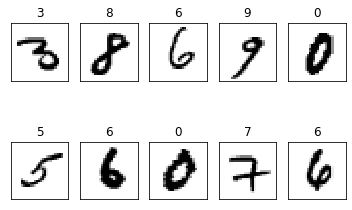

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

y_train, y_test = tf.one_hot(y_train, depth=10).numpy(), tf.one_hot(y_test, depth=10).numpy()

#########
# 신경망 모델 구성
######

def make_model():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation=tf.nn.relu, use_bias=False, input_shape=(784,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation=tf.nn.relu, use_bias=False),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax, use_bias=False)
  ])

  return model

model = make_model()
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#########
# 신경망 모델 학습
######

batch_size = 100
epoch = 30

model.fit(x=x_train, 
          y=y_train,
          batch_size=batch_size,
          epochs=epoch)

#########
# 결과 확인
######

model.evaluate(x=x_test,
               y=y_test,
               batch_size=batch_size)

#########
# 결과 확인 (matplot)
######

num = 3
images = x_train[10*num:10*(num+1)]
predicts = tf.argmax(model(images), 1)

fig = plt.figure()
for i in range(10):
  subplot = fig.add_subplot(2, 5, i + 1)
  
  subplot.set_xticks([])
  subplot.set_yticks([])
  
  subplot.set_title('%d' % predicts[i])
  subplot.imshow(images[i].reshape((28, 28)),
                  cmap=plt.cm.gray_r)

#########
# 모델 저장
######

savefile_path = 'drive/My Drive/Colab Notebooks/3분 딥러닝 텐서플로맛/06 - MNIST/saved model'
model.save_weights(savefile_path + '/my_weight_model.h5', save_format='h5',)